In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('seaborn')

C:\Users\Mohammad Badzohreh\AppData\Local\Temp\ipykernel_14520\3131379928.py:4: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


Read Image

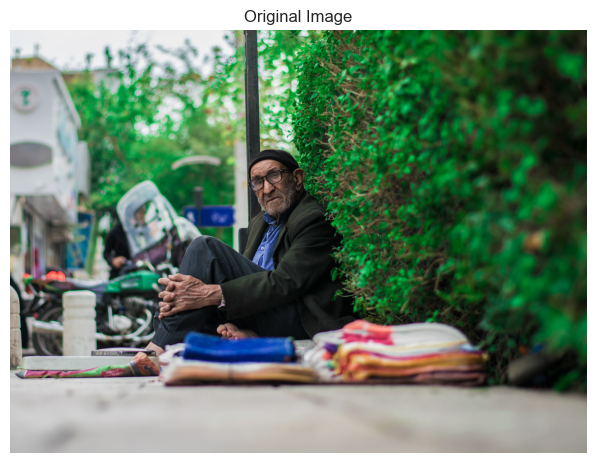

In [2]:
image = cv2.imread("image/pexels-arian-malek-khosravi-3972462.jpg")
plt.axis("off")
plt.title("Original Image")
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.show()

Rgb histogram

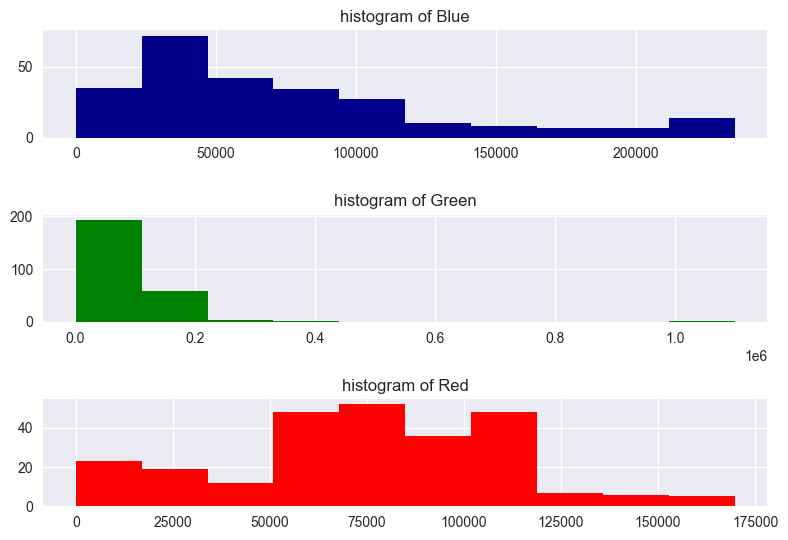

In [3]:
blue_histogram = cv2.calcHist([image], [0], None, [256], [0, 256])
red_histogram = cv2.calcHist([image], [1], None, [256], [0, 256])
green_histogram = cv2.calcHist([image], [2], None, [256], [0, 256])

plt.subplot(3,1,1)
plt.title("histogram of Blue")
plt.hist(blue_histogram,color="darkblue")

plt.subplot(3,1,2)
plt.title("histogram of Green")
plt.hist(green_histogram,color="green")

plt.subplot(3,1,3)
plt.title("histogram of Red")
plt.hist(red_histogram,color="red")

plt.tight_layout()
plt.show()

Rgb histogram

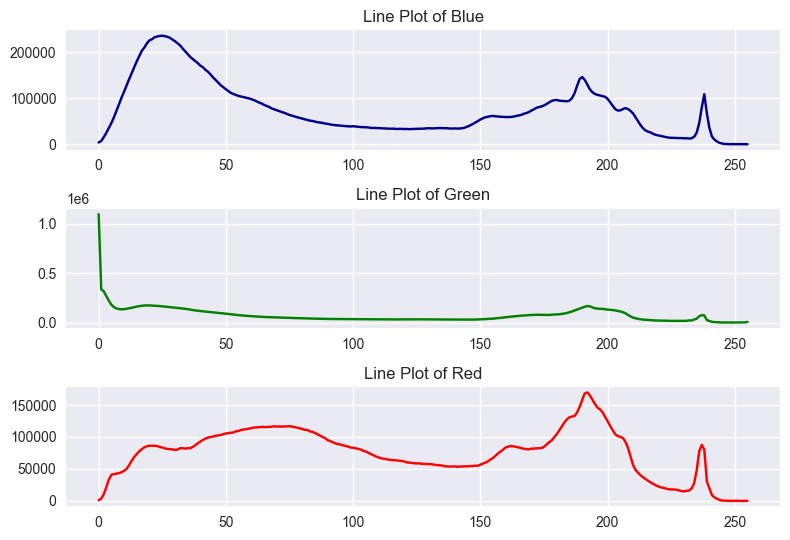

In [4]:
blue_histogram = cv2.calcHist([image], [0], None, [256], [0, 256])
red_histogram = cv2.calcHist([image], [1], None, [256], [0, 256])
green_histogram = cv2.calcHist([image], [2], None, [256], [0, 256])

plt.subplot(3,1,1)
plt.title("Line Plot of Blue")
plt.plot(blue_histogram,color="darkblue")

plt.subplot(3,1,2)
plt.title("Line Plot of Green")
plt.plot(green_histogram,color="green")

plt.subplot(3,1,3)
plt.title("Line Plot of Red")
plt.plot(red_histogram,color="red")

plt.tight_layout()
plt.show()

Visualizing the Final Results All together!


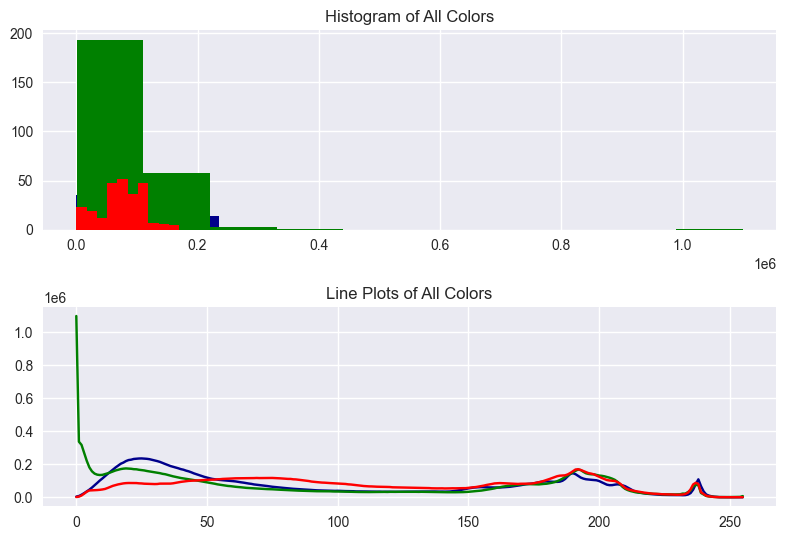

In [5]:
blue_histogram = cv2.calcHist([image], [0], None, [256], [0, 256])
red_histogram = cv2.calcHist([image], [1], None, [256], [0, 256])
green_histogram = cv2.calcHist([image], [2], None, [256], [0, 256])

plt.subplot(2,1,1)
plt.title("Histogram of All Colors")
plt.hist(blue_histogram,color="darkblue")
plt.hist(green_histogram,color="green")
plt.hist(red_histogram,color="red")

plt.subplot(2,1,2)
plt.title("Line Plots of All Colors")
plt.plot(blue_histogram,color="darkblue")
plt.plot(green_histogram,color="green")
plt.plot(red_histogram,color="red")

plt.tight_layout()
plt.show()

Color Name histogram

In [10]:
def show_rgb_equalized(img):
    channels = cv2.split(img)
    eq_channels = []
    for ch, color in zip(channels, ['B', 'G', 'R']):
        eq_channels.append(cv2.equalizeHist(ch))

    eq_image = cv2.merge(eq_channels)
    eq_image = cv2.cvtColor(eq_image, cv2.COLOR_BGR2RGB)
    plt.imshow(eq_image)
    plt.show()

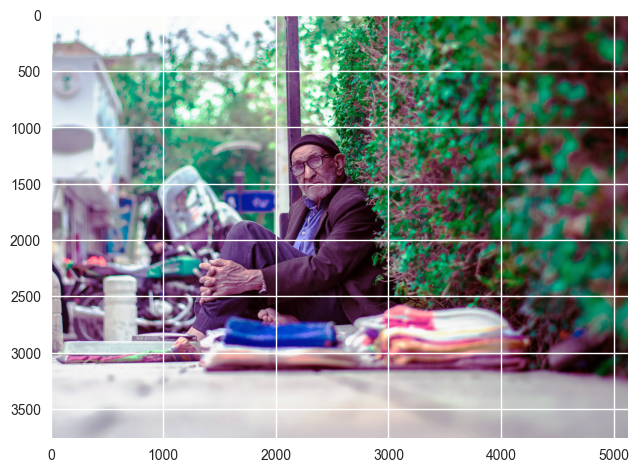

In [11]:
show_rgb_equalized(image)

In [12]:
def show_hsv_equalized(img):
    H, S, V = cv2.split(cv2.cvtColor(img, cv2.COLOR_BGR2HSV))
    eq_V = cv2.equalizeHist(V)
    eq_image = cv2.cvtColor(cv2.merge([H, S, eq_V]), cv2.COLOR_HSV2RGB)
    plt.imshow(eq_image)
    plt.show()

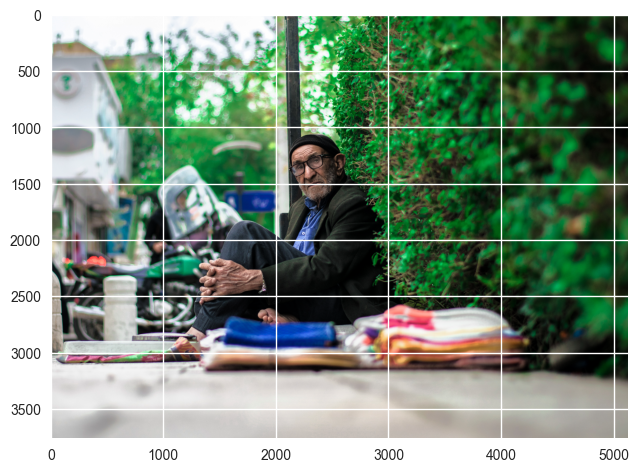

In [13]:
show_hsv_equalized(image)

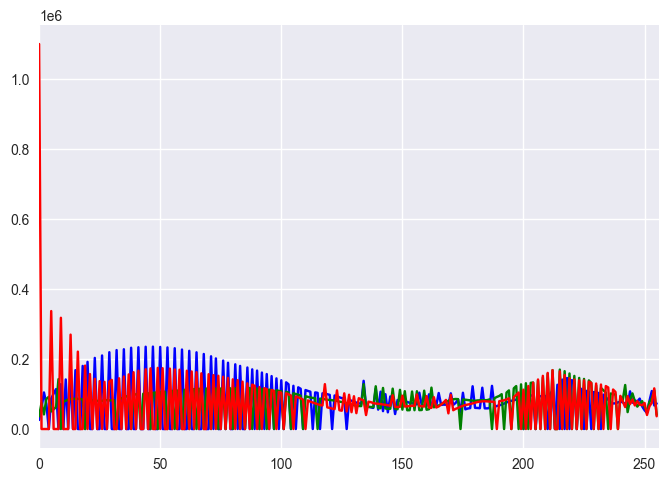

In [14]:
import cv2
import matplotlib.pyplot as plt
channels = cv2.split(image)
eq_channels = []
for ch, color in zip(channels, ['B', 'G', 'R']):
    eq_channels.append(cv2.equalizeHist(ch))
eq_image = cv2.merge(eq_channels)
cv2.namedWindow("Original", cv2.WINDOW_AUTOSIZE)
cv2.namedWindow("Equalized Image", cv2.WINDOW_AUTOSIZE)
cv2.imshow("Original", image)
cv2.imshow("Equalized Image", eq_image)
cv2.waitKey()
cv2.destroyAllWindows()
############
# Plot histogram for equalized image
# show Histogram
channels = ('b', 'g', 'r')
# we now separate the colors and plot each in the Histogram
for i, color in enumerate(channels):
    histogram = cv2.calcHist([eq_image], [i], None, [256], [0, 256])
    plt.plot(histogram, color=color)
    plt.xlim([0, 256])
plt.show()

In [19]:
def show_img(path):

    img = cv2.imread(path)
    b, g, r = img[:,:,0], img[:,:,1], img[:,:,2]
    hist_b = cv2.calcHist([b],[0],None,[256],[0,256])
    hist_g = cv2.calcHist([g],[0],None,[256],[0,256])
    hist_r = cv2.calcHist([r],[0],None,[256],[0,256])
    plt.plot(hist_r, color='r', label="r")
    plt.plot(hist_g, color='g', label="g")
    plt.plot(hist_b, color='b', label="b")
    plt.legend()
    plt.show()
    img2 = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
    h, s, v = img2[:,:,0], img2[:,:,1], img2[:,:,2]
    hist_h = cv2.calcHist([h],[0],None,[256],[0,256])
    hist_s = cv2.calcHist([s],[0],None,[256],[0,256])
    hist_v = cv2.calcHist([v],[0],None,[256],[0,256])
    plt.plot(hist_h, color='r', label="h")
    plt.plot(hist_s, color='g', label="s")
    plt.plot(hist_v, color='b', label="v")
    plt.legend()
    plt.show()

    return hist_r,hist_g, hist_b, hist_h, hist_s, hist_v

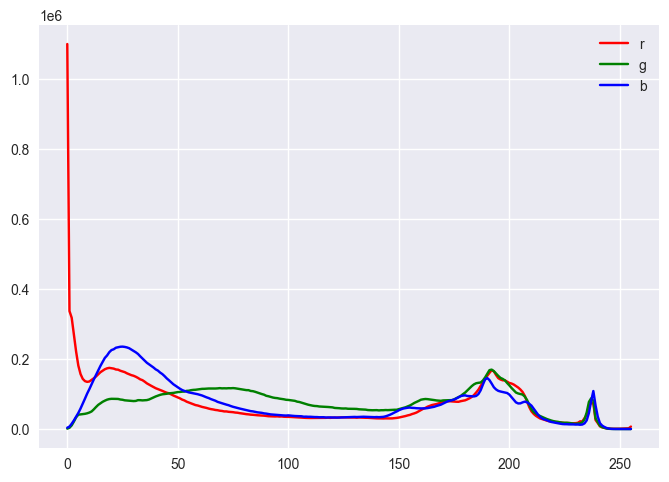

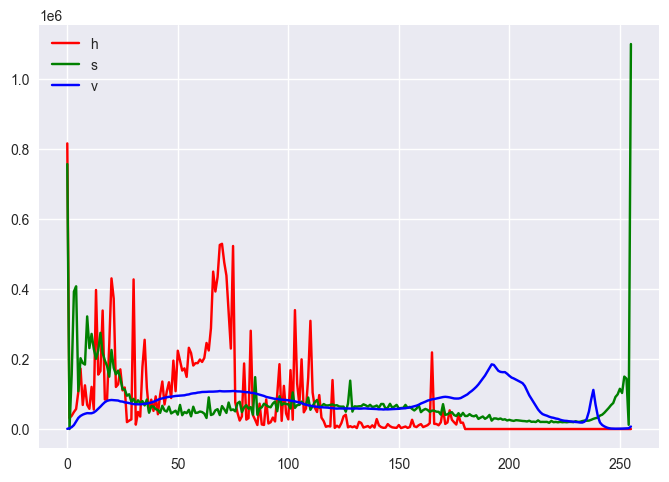

In [21]:
r,g,b,h,s,v = show_img("image/pexels-arian-malek-khosravi-3972462.jpg")
